In [1]:
# 目的：工作中经常需要绘制一些图像，整理常用的图像绘图代码供后续参考。
## 1. 线形图(包含散点):ax.plot(), ax.scatter(), ax.vlines()
## 2. 柱状图: ax.bar()
## 3. 条状图: ax.barh()
## 4. 直方图: ax.hist()
## 5. 箱线图: ax.boxplot()
## 6. 饼图: ax.pie()
## 7. 热图: ax.imshow()
## 8. 堆叠图：ax.stackplot()
## 案例参考：https://matplotlib.org/gallery/index.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 基本元素

In [3]:
#  Figure 包含所有 Axes，一个Axes就是通常说的一个图
fig = plt.figure() # 空Figure 无图

<Figure size 432x288 with 0 Axes>

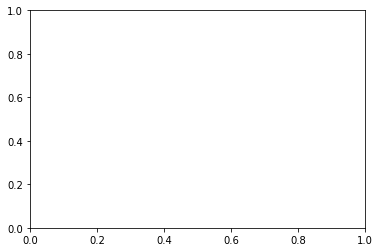

In [4]:
fig, ax = plt.subplots() # Figure 有一个图

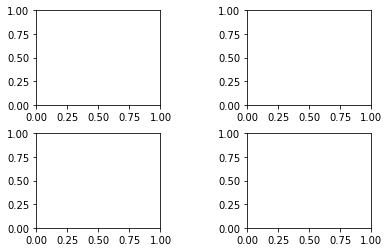

In [5]:
fig, axs = plt.subplots(2, 2) # Figure with a 2*2 grid of Axes
fig.subplots_adjust(wspace=0.7, hspace=0.3)

In [6]:
# 当前Figure大小
plt.rcParams["figure.figsize"]

[6.0, 4.0]

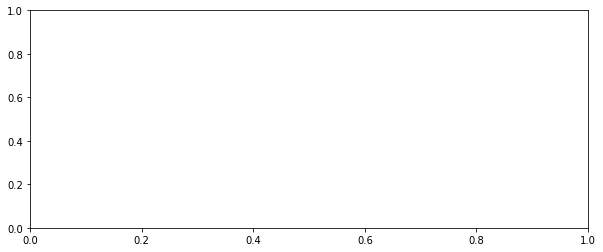

In [7]:
# 调整Figure大小
fig, ax = plt.subplots(figsize=(10, 4)) # Figure 有一个图

### 线形图(包含散点): ax.plot(), ax.scatter(), ax.vlines()

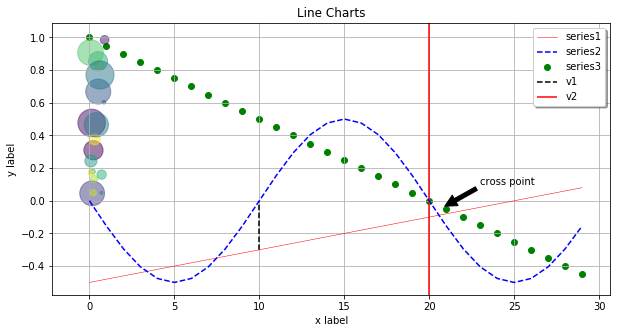

In [8]:
t = np.arange(0, 30, 1)

s1 = 0.02 * t - 0.5
s2 = 0.5 * np.sin(- np.pi * t/10) 
s3 = -0.05 * t + 1.0

fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(t, s1, color='red', linewidth=0.5, label='series1')
ax.plot(t, s2, color='blue', linestyle='--', label='series2')
ax.scatter(t, s3, color='green', marker='o', label='series3') # 散点图
x1=np.random.rand(20)
y1=np.random.rand(20)
colrs = np.random.rand(20) # colors
area = (30*np.random.rand(20))**2 # area是控制散点图的大小
ax.scatter(x1, y1,s=area, c=colrs, alpha=0.5) 

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Line Charts')
#ax.set(xlabel='time(s)', ylabel='voltage(mV)', title='Line Charts')

ax.grid()
ax.vlines(10, -0.3, 0.0, colors="black", linestyle='--',label='v1')
ax.vlines(20, 0, 1, transform=ax.get_xaxis_transform(), colors="red", label='v2')

# xy是点的位置，xytext是标注文字的位置
plt.annotate('cross point', xy=(20.8, -0.04), xytext=(23, 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.legend(loc='upper right', shadow=True)

plt.show()

#plt.savfig('line.png')

### 柱状图 ax.bar()

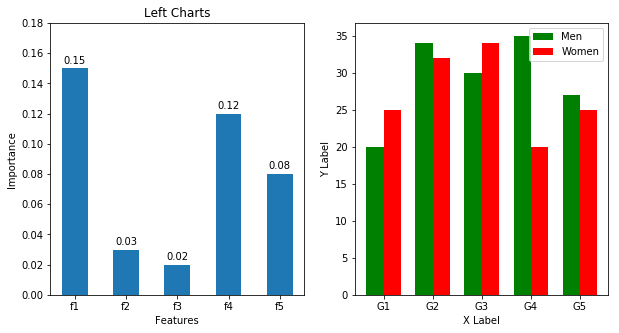

In [9]:
features = ['f1', 'f2', 'f3', 'f4', 'f5']
importances = [0.15, 0.03, 0.02, 0.12, 0.08]
#importances = [10, 3, 2, 12, 8]
x1 = np.arange(len(importances))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
rects = ax[0].bar(x1, importances, width=0.5)
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Importance')
ax[0].set_xticks(x1)
ax[0].set_xticklabels(features)
ax[0].set_yticks(np.arange(0,0.20,step=0.02)) # 设置y轴刻度
ax[0].set_title('Left Charts')
for rect in rects:
    height = rect.get_height()
    ax[0].annotate('{}'.format(height)
                  , xy=(rect.get_x()+rect.get_width()/2, height)
                  , xytext=(0, 3)
                  , textcoords="offset points"
                  , ha='center' # horizontalalignment
                  , va='bottom') # verticalalignment


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men = [20, 34, 30, 35, 27]
women = [25, 32, 34, 20, 25]
x2 = np.arange(len(labels))
width = 0.35
rects1 = ax[1].bar(x2 - width/2, men, width, color='green', label='Men')
rects2 = ax[1].bar(x2 + width/2, women, width, color='red', label='Women')
ax[1].set_xlabel('X Label')
ax[1].set_ylabel('Y Label')
ax[1].set_xticks(x2)
ax[1].set_xticklabels(labels)
ax[1].legend()

### 条状图 ax.barh()

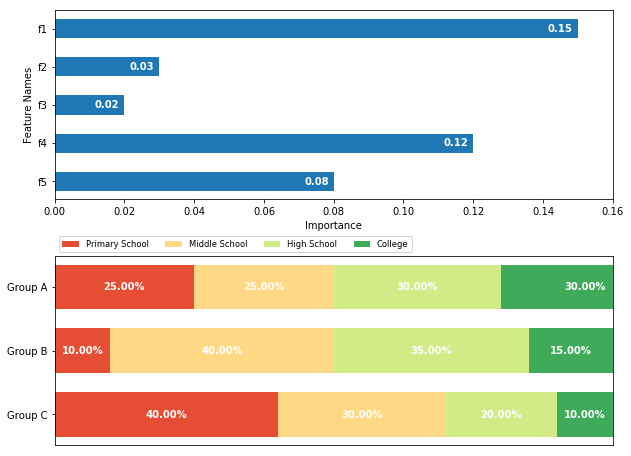

In [10]:
features = ['f1', 'f2', 'f3', 'f4', 'f5']
importances = [0.15, 0.03, 0.02, 0.12, 0.08]
y_pos = np.arange(len(features))
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.3)

recth = ax.barh(y_pos, importances, height=0.5)

ax.set_xlim(0, 0.16)  # 设置x轴的范围
ax.set_xticks(np.arange(0, 0.18, step=0.02)) # 设置x轴的刻度
ax.set_yticks(y_pos)  
ax.set_yticklabels(features)
ax.invert_yaxis() # labels从上到下排列
ax.set_xlabel("Importance")
ax.set_ylabel("Feature Names")
for rect in recth:
    length = rect.get_width() # 获取柱子的宽度（横轴）
    ax.annotate('{}'.format(length)
                  , xy=(length, rect.get_y()+rect.get_height()/2)
                  , xytext=(-5, 0) # 改变数字会改变标注文字的位置
                  , textcoords="offset points"
                  , horizontalalignment='right'
                  , verticalalignment='center'
                  , weight='bold' # 标准加粗
                  , color='white'
                  #, clip_on=True
               )


category_names = ['Primary School', 'Middle School', 'High School', 'College']
results = {
    'Group A':[0.25, 0.25, 0.3, 0.3],
    'Group B':[0.1, 0.4, 0.35, 0.15],
    'Group C':[0.4, 0.3, 0.2, 0.1]
}

ax2.invert_yaxis() # 反转y轴
ax2.xaxis.set_visible(False)
ax2.set_xlim(0, 1)

data = np.array(list(results.values()))
# array([[0.25 , 0.25 , 0.3 , 0.2 ],
#        [0.1 , 0.4 , 0.35, 0.15],
#        [0.4 , 0.3 , 0.2 , 0.1 ]])
data_cum = data.cumsum(axis=1)
# array([[0.25, 0.5 , 0.8 , 1.1 ],
#        [0.1 , 0.5 , 0.85, 1.  ],
#        [0.4 , 0.7 , 0.9 , 1.  ]])

# 设置颜色
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, 4))

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i] # 取某一列
    starts = data_cum[:, i] - widths # 起始端
    ax2.barh(list(results.keys()), widths, left = starts, height=0.7,
           label=colname, color=color)
    
    xcenters = starts + widths/2
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax2.text(x, y, "{:.2%}".format(c), ha='center', va='center',
                color="white", weight='bold')

ax2.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
           loc='lower left', fontsize='small')
        

### 直方图 ax.hist()

In [11]:
from matplotlib.ticker import PercentFormatter
from matplotlib import colors

([array([0.00253941, 0.01117339, 0.04570932, 0.09446594, 0.13001764,
         0.12087577, 0.06856399, 0.02640983, 0.00761822, 0.00050788]),
  array([0.00660246, 0.02336254, 0.09497382, 0.18537671, 0.24987764,
         0.24327518, 0.13865162, 0.05688272, 0.01523644, 0.00152364]),
  array([0.00964975, 0.04012263, 0.13408069, 0.27577959, 0.3738007 ,
         0.37126129, 0.20924713, 0.08583195, 0.02082314, 0.00304729])],
 array([-3.14142539, -2.48510416, -1.82878294, -1.17246171, -0.51614049,
         0.14018073,  0.79650196,  1.45282318,  2.10914441,  2.76546563,
         3.42178685]),
 <a list of 3 Lists of Patches objects>)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


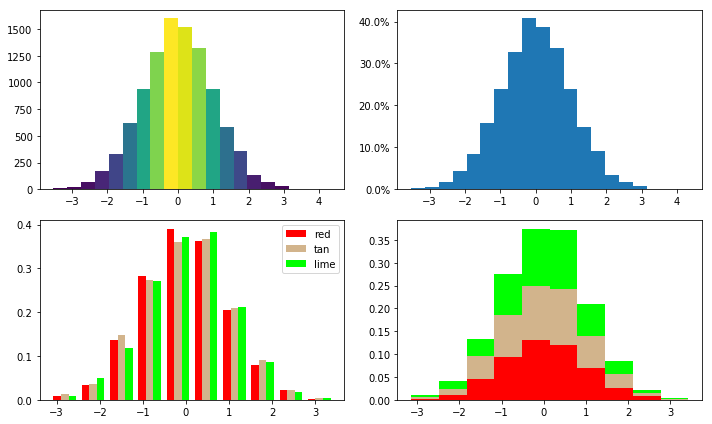

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), tight_layout=True)
x = np.random.randn(10000)
N, bins, patches = axs[0][0].hist(x, bins=20) # N是每个bins有的数据数量，bins是分箱的点，20个bin有21个点

fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for f, p in zip(fracs, patches):
    color = plt.cm.viridis(norm(f))
    p.set_facecolor(color)
axs[0][1].hist(x, bins=20, density=True)
axs[0][1].yaxis.set_major_formatter(PercentFormatter(xmax=1)) # y轴显示百分比

xg = np.random.randn(1000, 3)
color_list = ['red', 'tan', 'lime']
axs[1][0].hist(xg, bins=10, density=True, histtype='bar', color=color_list, label=color_list)
axs[1][0].legend()

axs[1][1].hist(xg, bins=10, density=True, histtype='bar', stacked=True, color=color_list)

### 箱图 ax.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x11c85f588>,
 'caps': [<matplotlib.lines.Line2D at 0x11c85f978>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c85f160>,
 'medians': [<matplotlib.lines.Line2D at 0x11c85fda0>,
 'fliers': [],
 'means': []}

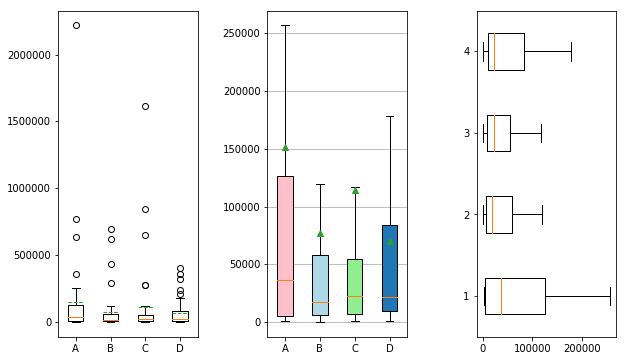

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
fig.subplots_adjust(wspace=0.5)

data = np.random.lognormal(size=(40, 4), mean=10, sigma=1.75)
labels = list('ABCD')
axs[0].boxplot(data, labels=labels, showmeans=True, meanline=True)

bplot = axs[1].boxplot(data, labels=labels, showfliers=False, vert=True, patch_artist=True, showmeans=True)
color_list = ['pink', 'lightblue', 'lightgreen']
for p, c in zip(bplot['boxes'], color_list):
    p.set_facecolor(c)
axs[1].yaxis.grid(True)

axs[2].boxplot(data, 0, 'rs', 0, showfliers=False)

### 饼状图

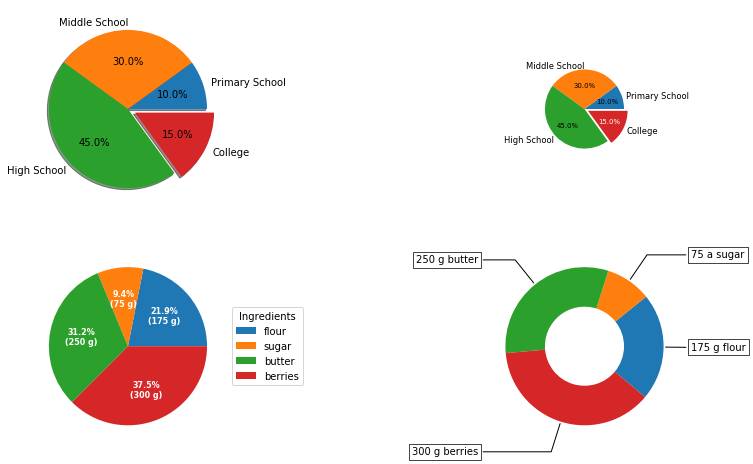

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
labels = ['Primary School', 'Middle School', 'High School', 'College']
sizes = [10, 30, 45, 15]
explode = (0, 0, 0, 0.1) # 最后一块突出

ax[0][0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

patches, texts, autotexts = ax[0][1].pie(sizes, labels=labels, autopct='%1.1f%%', 
                                     textprops={'size':'smaller'}, shadow=False, radius=0.5
                                     , explode=(0, 0, 0, 0.05))
plt.setp(autotexts, size='x-small') # 设置百分号字体
autotexts[3].set_color('white')

recipe = ['175 g flour', '75 a sugar', '250 g butter', '300 g berries']
data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
wedges, texts, autotexts = ax[1][0].pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
# pct是默认会传给autopct的，值应该是data转换成百分制的。
# 例如，np.array([175, 75, 250, 300])
# 转化为百分制后，array([0.21875, 0.09375, 0.3125 , 0.375  ])
ax[1][0].legend(wedges, ingredients, title="Ingredients", loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold") # 控制百分号显示加粗

wedges, texts = ax[1][1].pie(data, wedgeprops=dict(width=0.5), startangle=-40) # startangle是画圈的起始角度

bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

# Wedge是扇形，r是半径，theta1是开始角度，theta2是结束角度, width是环形的宽度
# 0 Wedge(center=(0, 0), r=1, theta1=-40, theta2=38.75, width=0.5)
# 1 Wedge(center=(0, 0), r=1, theta1=38.75, theta2=72.5, width=0.5)
# 2 Wedge(center=(0, 0), r=1, theta1=72.5, theta2=185, width=0.5)
# 3 Wedge(center=(0, 0), r=1, theta1=185, theta2=320, width=0.5)
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1:"left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax[1][1].annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

### 热图

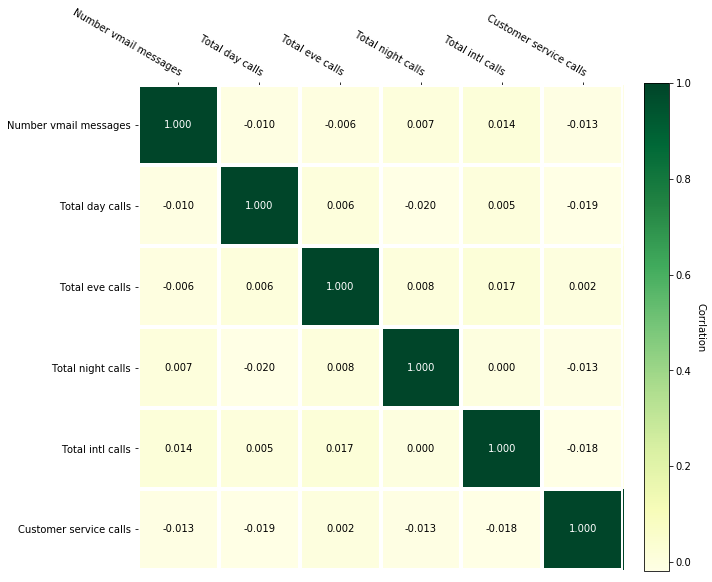

In [15]:
df = pd.read_csv(
    'https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv',
    usecols=['Number vmail messages','Total day calls', 'Total eve calls'
 ,'Total night calls','Total intl calls', 'Customer service calls']) 

cor_matrix = df.corr()
labels = cor_matrix.columns.values

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cor_matrix.values, cmap='YlGn')

cbar = ax.figure.colorbar(im, ax=ax, cmap='YlGn', fraction=0.046, pad=0.04)
cbar.ax.set_ylabel("Corrlation", rotation=-90, va="bottom")

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
# 设置横轴坐标显示在上面
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

# 设置轴线不可见
for edge, spine in ax.spines.items():
    spine.set_visible(False)
# 设置网格线白色
ax.set_xticks(np.arange(len(labels)+1)-0.5, minor=True)
ax.set_yticks(np.arange(len(labels)+1)-0.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=4) # 设置白线的宽度
ax.tick_params(which="minor", bottom=False, left=False)

textcolors=["black", "white"]
threshold = cor_matrix.values.max()/2

for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i
                       , "{:.3f}".format(cor_matrix.iloc[i, j])                   
                       , color=textcolors[int(cor_matrix.iloc[i,j]>threshold)]
                       , ha="center", va="center")
        
fig.tight_layout()

### 堆叠图

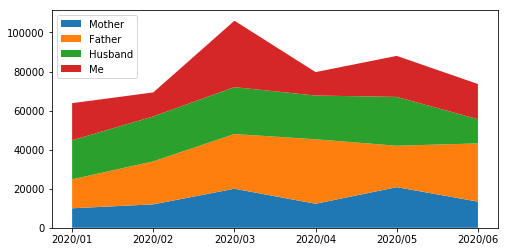

In [16]:
year = ['2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06']
salary = {
    'Mother': [10000, 12000, 20000, 12300, 20800, 13400],
    'Father': [14800, 22000, 28000, 33000, 21200, 29800],
    'Husband': [20000, 23000, 24000, 22400, 25000, 12400],
    'Me': [19000, 12300, 34000, 12000, 21000, 18000]}

fig, ax = plt.subplots(figsize=(8, 4))
ax.stackplot(year, salary.values(), labels=salary.keys())
ax.legend(loc='upper left')